In [3]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/e1/5f/0b5b11fd766b674b0eb887e15006175503f23c230ced2a22fb186262e1e5/scikit_learn-1.3.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.3.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl.metadata
  Using cached joblib-1.3.1-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.0-cp310-cp310-macosx_12_0_arm64.whl (9.5 MB)
Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
Using 

['get /ndxpro/v1/aibroker/entities/iot/history'
 'get /ndxpro/v1/aibroker/entities/iot' 'get /ndxpro/v1/aibroker/entities'
 'get /ndxpro/v1/aibroker/entities/iot/temporal'
 'get /ndxpro/v1/aibroker/entities/iot/{entityid}'
 'get /ndxpro/v1/aibroker/entities/{entityid}']


<AxesSubplot: xlabel='ds'>

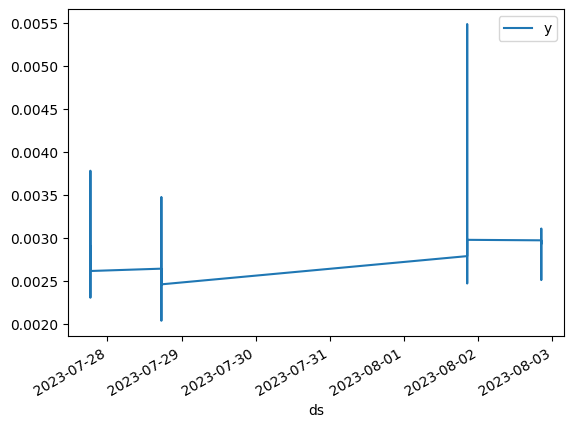

In [5]:
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
import cmdstanpy
from sklearn.preprocessing import LabelEncoder
# cmdstanpy.install_cmdstan()
# cmdstanpy.install_cmdstan(compiler=True) 
encode = LabelEncoder()

# py.init_notebook_mode()


metric1 = pd.read_csv("metricbeat-230802-ai-broker-1.csv")
metric2 = pd.read_csv("metricbeat-230802-ai-broker-2.csv")
metric3 = pd.read_csv("metricbeat-230802-ai-broker-3.csv")
metric4 = pd.read_csv("metricbeat-230802-ai-broker-4.csv")
metric5 = pd.read_csv("metricbeat-230802-ai-broker-5.csv")

zipkin = pd.read_csv("zipkin-230801-all-broker.csv")



metric_lst = [metric1,metric2,metric3,metric4,metric5]
metric_merge = pd.merge(metric1,metric2, on='container_name')
metric_merge = pd.concat([metric1,metric2,metric3,metric4,metric5])
metric_merge.drop(['Unnamed: 0'], axis = 1, inplace = True)
metric_merge.drop(['new_index'], axis = 1, inplace = True)
zipkin.drop(['Unnamed: 0'], axis = 1, inplace = True)
zipkin.drop(['new_index'], axis = 1, inplace = True)
# print(metric_merge)

merged = pd.merge(metric_merge,zipkin,on=['timestamp_5seconds'])
# merged.drop(['Unnamed: 0'], axis = 1, inplace = True)
# merged.drop(['new_index'], axis = 1, inplace = True)
# print(merged)
print(merged['api_name'].unique())

api_name_lst = []
for i in merged["api_name"].unique():
    api_name_lst.append(i)


train_dataset = pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(merged['timestamp_5seconds'])
train_dataset['y'] = merged['cpu_usage']
# train_dataset['duration'] = merged['duration']

# plot
train_dataset.set_index('ds').plot()

# print(train_dataset)
# print(type(train_dataset))


# ## plot
# # train_dataset.set_index('ds').plot()


# # plt.plot(train_dataset['ds'],train_dataset[''])
# # plt.show()
# # prophet modeling
# prophet_basic = Prophet()
# prophet_basic.fit(train_dataset)


# future = prophet_basic.make_future_dataframe(periods=1)
# print(future.tail())


# forecast = prophet_basic.predict(future)
# print(forecast)
